In [1]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings

warnings.filterwarnings(action="ignore")

In practice, we’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

x has two dimensions:

One column for a single input
Ten rows, each corresponding to one observation

In [3]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

y is one-dimensional with ten items. Again, each item corresponds to one observation. It contains only zeros and ones since this is a binary classification problem.

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [5]:
model = LogisticRegression(solver='liblinear', random_state=0)

The above cell creates an instance of LogisticRegression and binds its references to the variable `model`. LogisticRegression has several optional parameters that define the behavior of the model and approach:

- **penalty** is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

- **dual** is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

- **tol** is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

- **C** is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

- **fit_intercept** is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

- **intercept_scaling** is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

- **class_weight** is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

- **random_state** is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

- **solver** is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

- **max_iter** is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

- **multi_class** is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

- **verbose** is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

- **warm_start** is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

- **n_jobs** is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

- **l1_ratio** is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

**You should match the solver and regularization method**:

'liblinear' solver doesn’t work without regularization.
'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
'saga' is the only solver that supports elastic-net regularization.

In [6]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

**.fit()** takes x, y, and possibly observation-related weights. Then it fits the model and returns the model instance.

You can view the classes to classify with here:

In [7]:
model.classes_

array([0, 1])

You can view the intercept 𝑏₀ here:

In [8]:
model.intercept_

array([-1.04608067])

You can view the slope 𝑏₁ here:

In [9]:
model.coef_

array([[0.51491375]])

Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one as values:

In [10]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the matrix above, each row corresponds to a single observation. 

The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
The second column is the probability that the output is one, or 𝑝(𝑥).

This function returns the predicted output values as a one-dimensional array.

In [11]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

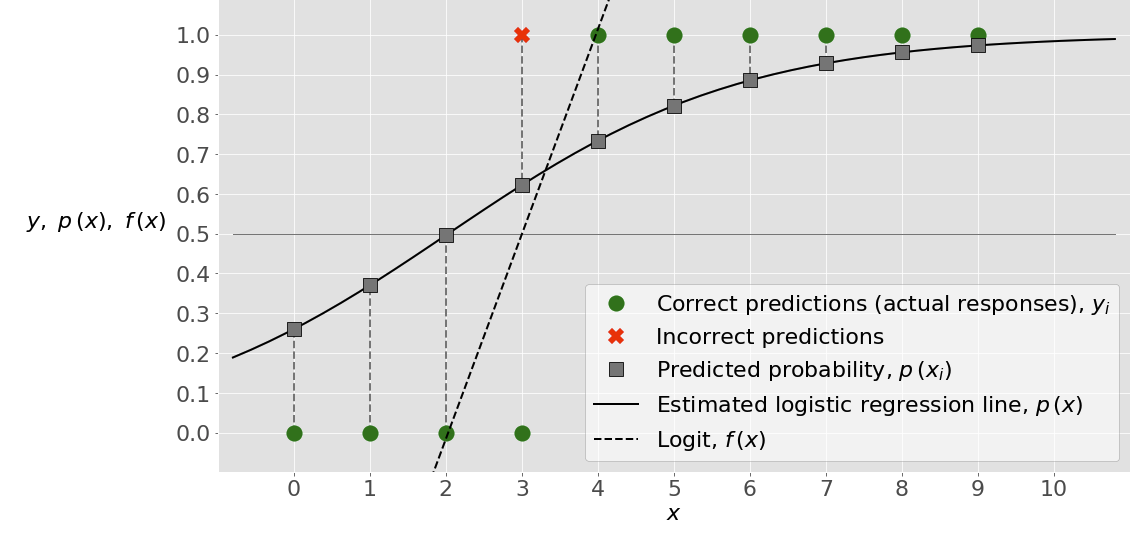

The green circles represent the actual responses as well as the correct predictions. The red × shows the incorrect prediction. The full black line is the estimated logistic regression line 𝑝(𝑥). The grey squares are the points on this line that correspond to 𝑥 and the values in the second column of the probability matrix. The black dashed line is the logit 𝑓(𝑥).

The value of 𝑥 slightly above 2 corresponds to the threshold 𝑝(𝑥)=0.5, which is 𝑓(𝑥)=0. This value of 𝑥 is the boundary between the points that are classified as zeros and those predicted as ones.

For example, the first point has input 𝑥=0, actual output 𝑦=0, probability 𝑝=0.26, and a predicted value of 0. The second point has 𝑥=1, 𝑦=0, 𝑝=0.37, and a prediction of 0. Only the fourth point has the actual output 𝑦=0 and the probability higher than 0.5 (at 𝑝=0.62), so it’s wrongly classified as 1. All other values are predicted correctly.

When you have nine out of ten observations classified correctly, the accuracy of your model is equal to 9/10=0.9, which you can obtain with **.score()**:

In [13]:
model.score(x, y)

0.9

You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:

**True negatives** in the upper-left position
**False negatives** in the lower-left position
**False positives** in the upper-right position
**True positives** in the lower-right position

To create the confusion matrix, you can use **confusion_matrix()** and provide the actual and predicted outputs as the arguments:

<Axes: >

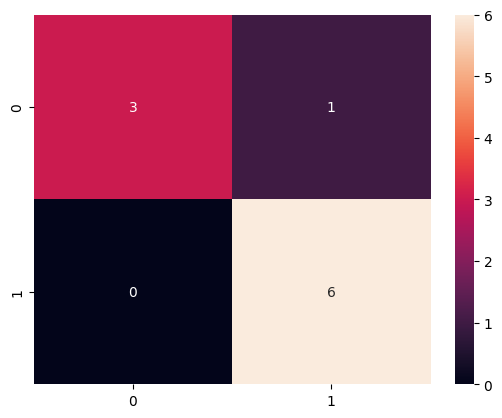

In [20]:
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True)

<Axes: >

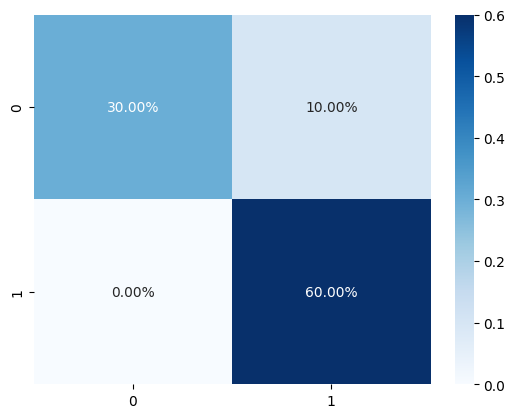

In [22]:
cf_matrix = confusion_matrix(y, model.predict(x))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<Axes: >

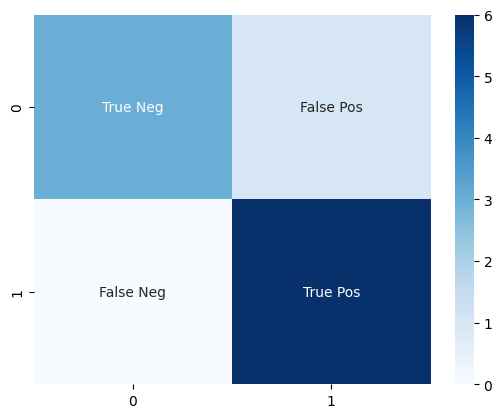

In [25]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

You can get a more comprehensive report on the classification with classification_report():

In [26]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



You can improve your model by setting different parameters. For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0:

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

Recall that C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

In [30]:
model.intercept_

array([-1.04608067])

In [31]:
model.coef_

array([[0.51491375]])

In [32]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [33]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

As you can see, the absolute values of the intercept 𝑏₀ and the coefficient 𝑏₁ are larger. This is the case because the larger value of C means weaker regularization, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.

In [34]:
model.score(x, y)

0.9

In [35]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



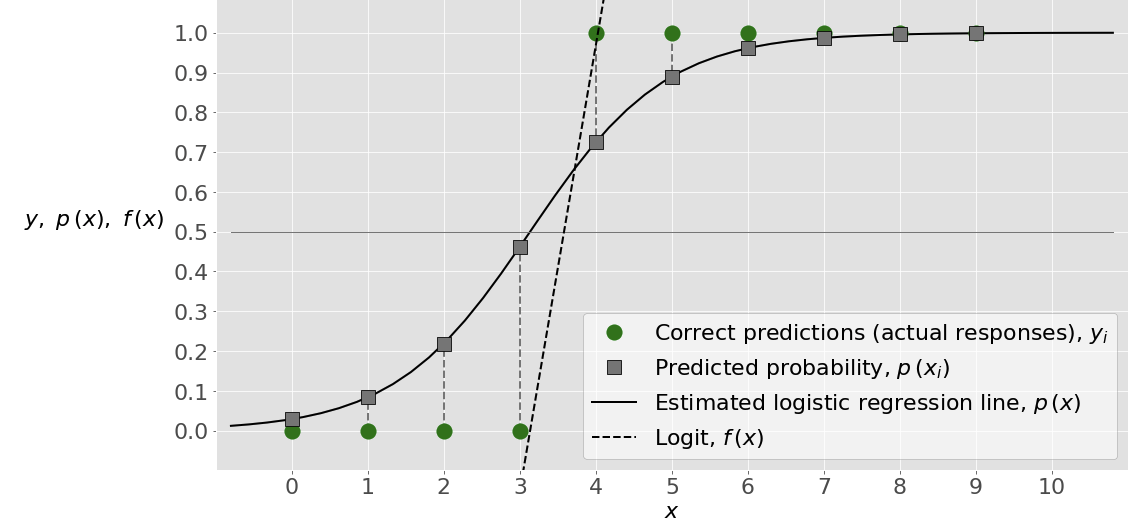

This figure illustrates that the estimated regression line now has a different shape and that the fourth point is correctly classified as 0. There isn’t a red ×, so there is no wrong prediction.